In [31]:
!pip install shap
!pip install lime

In [32]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import shap
import lime
shap.initjs()

In [33]:
df=pd.read_csv("final_dataset.csv")
df

Rating                            Name Symbol  \
0         A           Whirlpool Corporation    WHR   
1       BBB           Whirlpool Corporation    WHR   
2       BBB           Whirlpool Corporation    WHR   
3       BBB           Whirlpool Corporation    WHR   
4       BBB           Whirlpool Corporation    WHR   
...     ...                             ...    ...   
1484     AA                   Gartner, Inc.     IT   
1485      B  SBA Communications Corporation   SBAC   
1486     AA            Imperial Oil Limited    IMO   
1487    BBB                       NVR, Inc.    NVR   
1488     BB     Kaiser Aluminum Corporation   KALU   

                      Rating Agency Name        Date             Sector  \
0             Egan-Jones Ratings Company  11/27/2015  Consumer Durables   
1             Egan-Jones Ratings Company   2/13/2014  Consumer Durables   
2                          Fitch Ratings  03-06-2015  Consumer Durables   
3                          Fitch Ratings   6/15/2012  Consumer Durables   
4     Standard & Poor's Ratings Services  10/24/2016  Consumer Durables   
...                                  ...         ...                ...   
1484          Egan-Jones Ratings Company   2/18/2016  Consumer Services   
1485  Standard & Poor's Ratings Services   8/28/2013  Consumer Services   
1486                                DBRS  10-07-2016             Energy   
1487           Moody's Investors Service  09-05-2012      Capital Goods   
1488  Standard & Poor's Ratings Services   4/28/2016      Capital Goods   

      currentRatio  quickRatio  cashRatio  daysOfSalesOutstanding  ...  \
0         0.945894    0.426395   0.099690               44.203245  ...   
1         1.033559    0.498234   0.203120               38.991156  ...   
2         0.963703    0.451505   0.122099               50.841385  ...   
3         1.019851    0.510402   0.176116               41.161738  ...   
4         0.957844    0.495432   0.141608               47.761126  ...   
...            ...         ...        ...                     ...  ...   
1484      0.862111    0.720623   0.281812               97.999541  ...   
1485      0.459629    0.266021   0.163323               19.955103  ...   
1486      0.986608    0.886943   0.100695               26.994041  ...   
1487     11.757767    7.115059   7.057420                1.079762  ...   
1488      2.962788    1.294743   0.428234               30.602414  ...   

      operatingCashFlowSalesRatio  payablesTurnover  Negative  Positive  \
0                        0.058638          3.906655  1.514332  1.045610   
1                        0.067239          4.002846  2.379140  0.875523   
2                        0.074426          3.483510  2.555911  0.778754   
3                        0.028394          4.581150  2.580837  1.275586   
4                        0.058065          3.857790  1.231846  1.154046   
...                           ...               ...       ...       ...   
1484                     0.159756          2.164291  1.554895  0.499336   
1485                     0.381332         16.799152  0.523903  0.611220   
1486                     0.073664          0.000000  0.000000  0.000000   
1487                     0.083018         15.758348  1.847731  0.783593   
1488                     0.114089         14.542373  1.108010  0.934619   

      Uncertainty  Litigious  Strong_Modal  Weak_Modal  Constraining  \
0        1.820804   1.225888      0.216333    0.450694      0.946458   
1        1.617815   1.427484      0.209364    0.399695      0.590027   
2        1.757188   1.357827      0.139776    0.399361      0.459265   
3        1.483239   1.216256      0.148324    0.355977      0.504301   
4        2.035788   0.635373      0.207469    0.414938      0.920643   
...           ...        ...           ...         ...           ...   
1484     1.144049   0.948107      0.145376    0.436129      0.486695   
1485     1.637197   0.349269      0.218293    0.414757      0.261952   
1486     4.716981

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

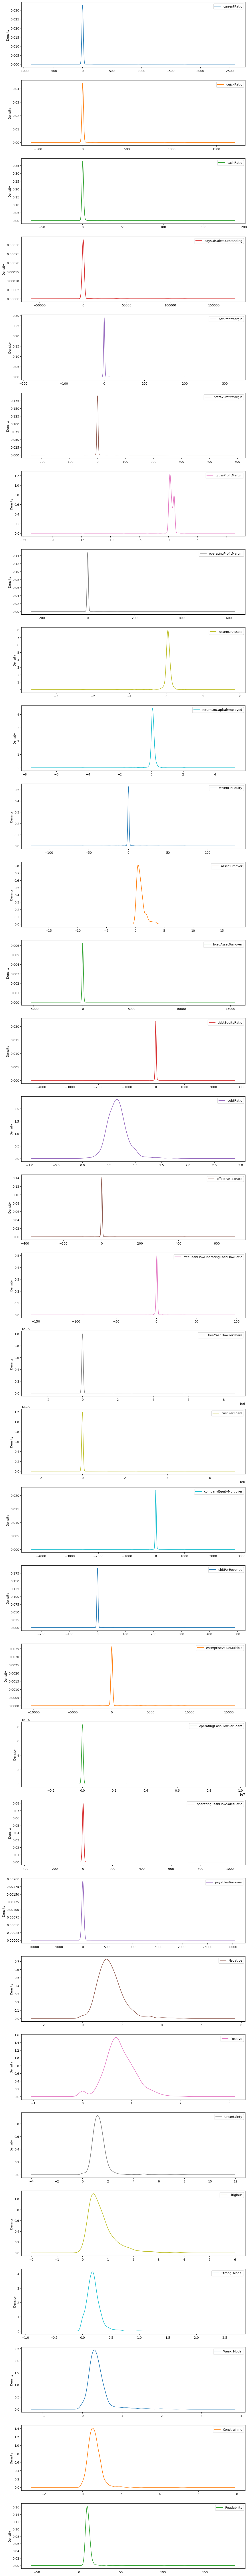

In [34]:
df.plot(kind="kde",
        subplots=True,
        figsize=(13,150),
        sharex=False,
        sharey=False)

In [35]:
df=pd.read_csv("final_dataset.csv")

In [36]:
def group_ratings(rating):
    if rating in ['AAA', 'AA']:
        return 'AA+'
    elif rating in ['CCC' , 'C' , 'D' , 'CC']:
        return 'CCC–'
    else:
        return rating

df['Rating'] = df['Rating'].apply(group_ratings)

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sector'] = label_encoder.fit_transform(df['Sector'])

label_encoder2 = LabelEncoder()
df['Symbol'] = label_encoder2.fit_transform(df['Symbol'])

label_encoder3 = LabelEncoder()
df['Rating'] = label_encoder3.fit_transform(df['Rating'])
#df['Rating'] = df['Rating'].apply(lambda x: 1 if x in ['AAA', 'BBB', 'AA', 'A'] else 0)

df.drop(["Name" , "Date" , "Rating Agency Name"] , axis = 1  , inplace = True)

In [38]:
X = df.drop(["Rating"] , axis = 1)
y = df["Rating"]


xTrain,xTest,yTrain,yTest=train_test_split(X,y,test_size=0.20,random_state=42)

In [42]:
label_encoder3.classes_


array(['A', 'AA+', 'B', 'BB', 'BBB', 'CCC–'], dtype=object)

In [62]:
pip install lightgbm


In [63]:
from lightgbm import LGBMClassifier

# Replace RandomForestClassifier with LGBMClassifier
model = LGBMClassifier(
    n_estimators=100,  # Number of boosting rounds (similar to trees in RF)
    learning_rate=0.1,  # Step size for boosting
    max_depth=-1,  # No maximum depth by default
    random_state=42  # For reproducibility
)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [64]:
#model=RandomForestClassifier()
model.fit(xTrain,yTrain)
pred=model.predict(xTest)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8676
[LightGBM] [Info] Number of data points in the train set: 1191, number of used features: 35
[LightGBM] [Info] Start training from score -1.537371
[LightGBM] [Info] Start training from score -2.892894
[LightGBM] [Info] Start training from score -2.058668
[LightGBM] [Info] Start training from score -1.473077
[LightGBM] [Info] Start training from score -1.083612
[LightGBM] [Info] Start training from score -3.368977
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [65]:
from lime.lime_tabular import LimeTabularExplainer

# creating an instance of the lime tabular explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(xTrain), feature_names=xTrain.columns,
            class_names=['A', 'AA+','B','BBB','CCC-'], mode='classification')


explanation = lime_explainer.explain_instance(data_row=xTest.iloc[1], predict_fn=model.predict_proba, top_labels=2, num_features=25)

# printing out the explanation
explanation.show_in_notebook()
explanation.save_to_file("text.html")

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

In [67]:
#shape explainer for some error debug
shap_explaner=shap.Explainer(model)(xTest)
#calculating shap values
shap_value = shap.Explainer(model).shap_values(xTest)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Class 4 Explanation:


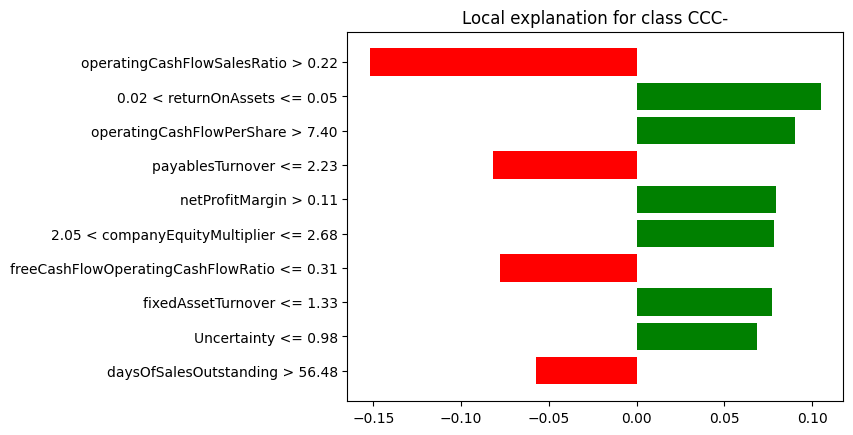

Class 3 Explanation:


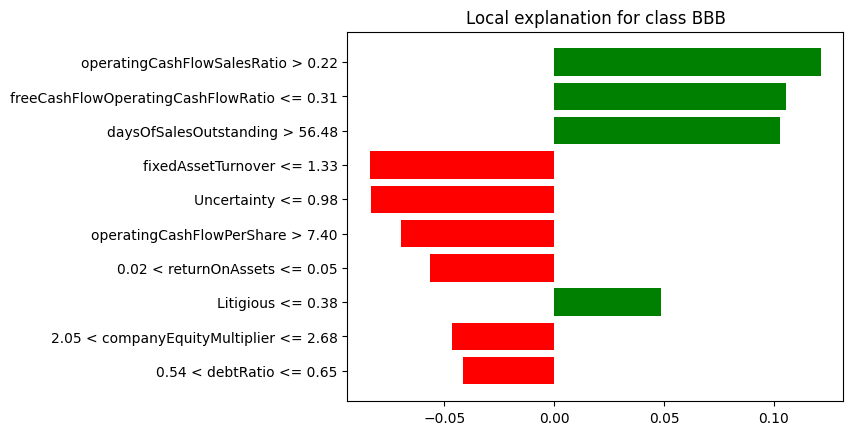

Class 0 Explanation:


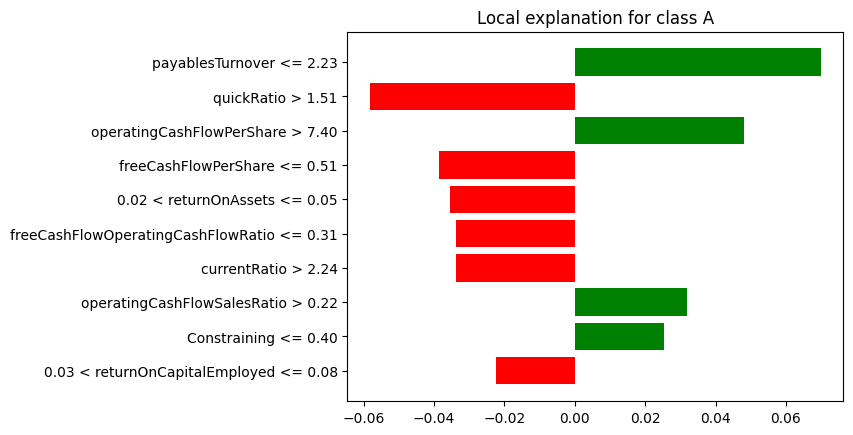

Class 2 Explanation:


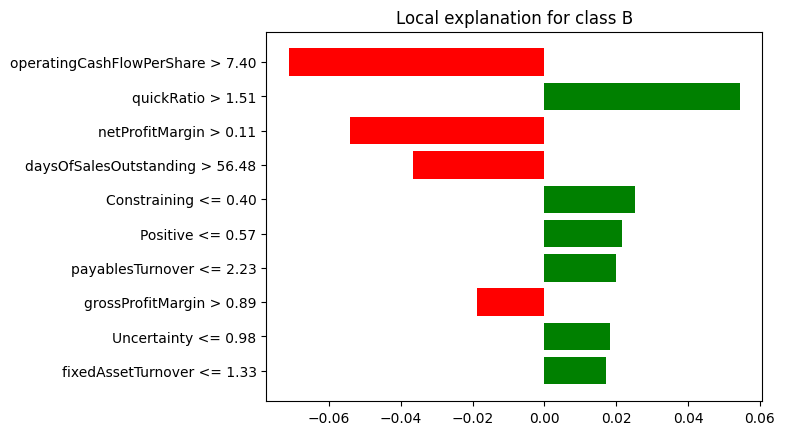

Class 1 Explanation:


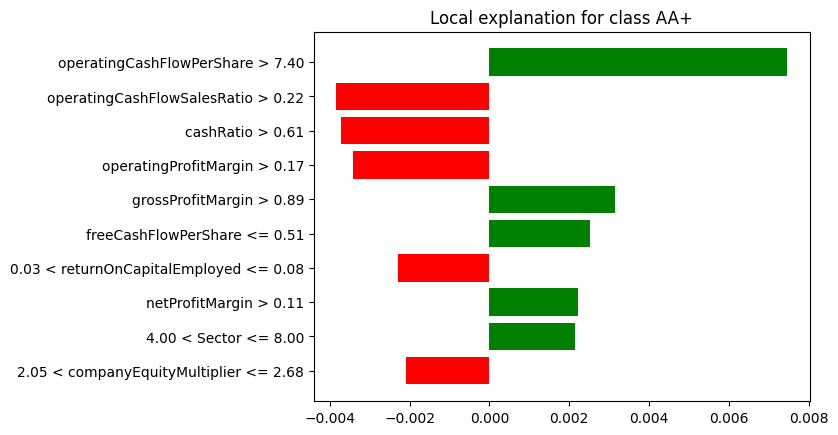

In [68]:
import matplotlib.pyplot as plt

# Generate explanation for a specific instance
explanation = lime_explainer.explain_instance(
    data_row=xTest.iloc[1],
    predict_fn=model.predict_proba,
    top_labels=5,  # Focus on the top 2 predicted classes
    num_features=10  # Reduce the number of features for clarity
)

# Iterate over the top predicted classes and plot their explanations
for label in explanation.top_labels:
    print(f"Class {label} Explanation:")
    fig = explanation.as_pyplot_figure(label=label)
    plt.show()


Summary plot for Class A


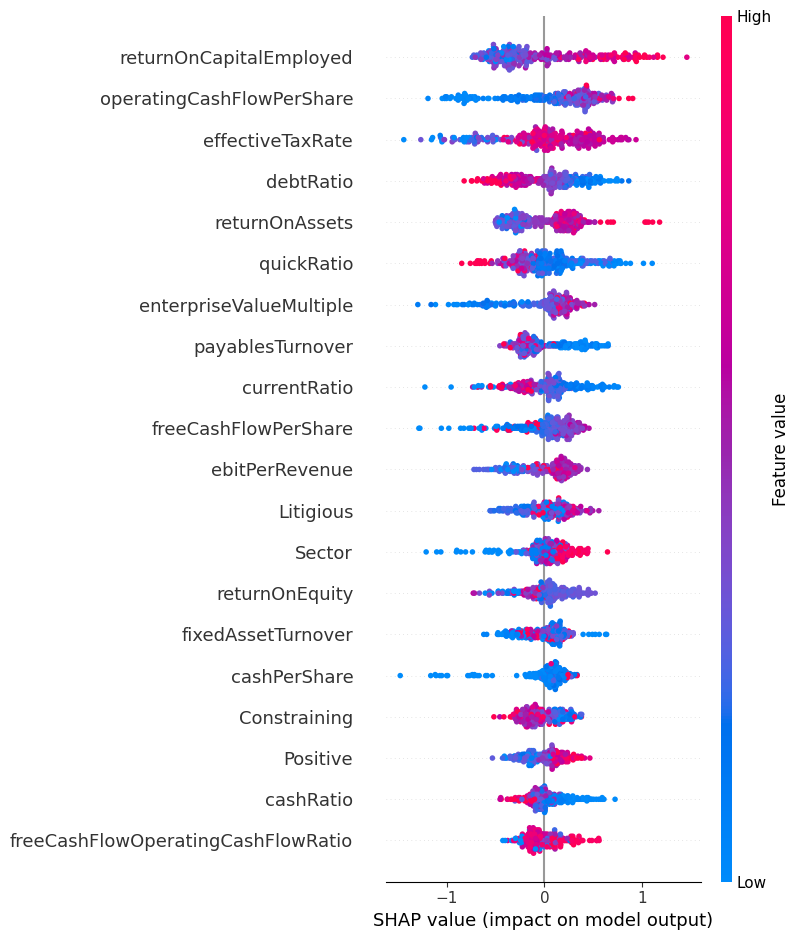

Summary plot for Class AA+


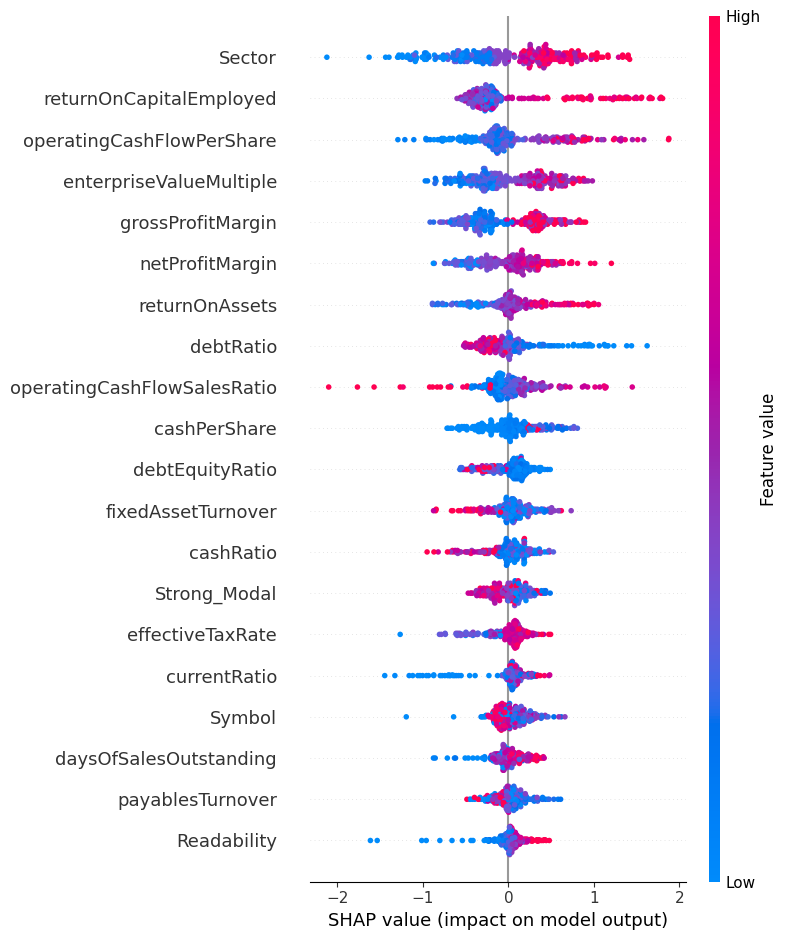

Summary plot for Class B


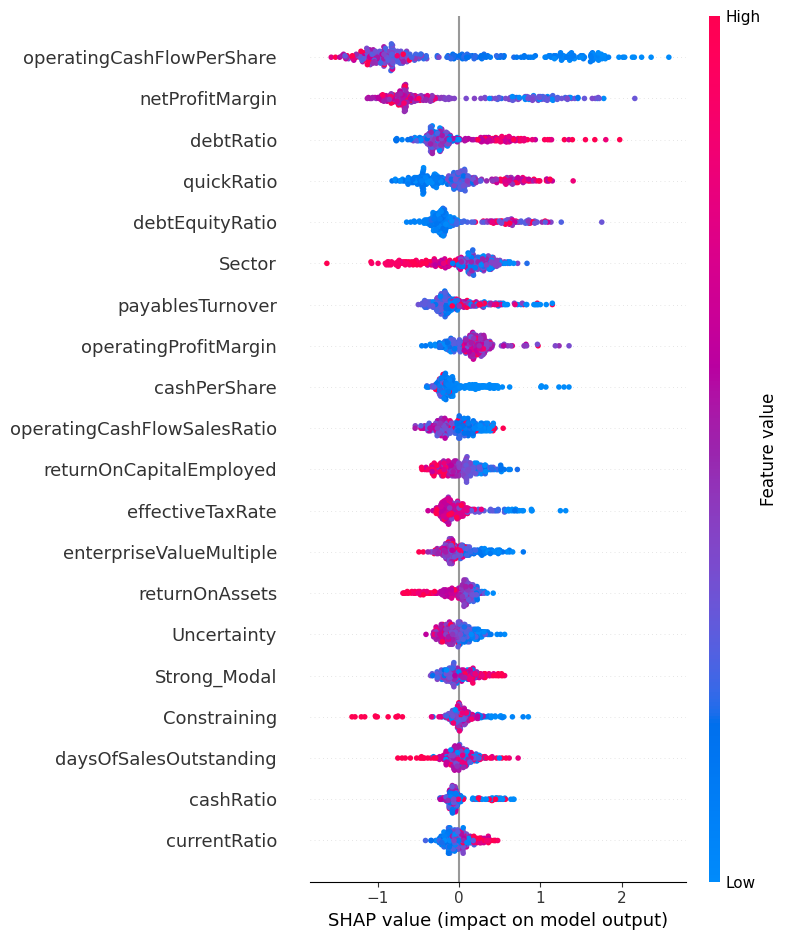

Summary plot for Class BB


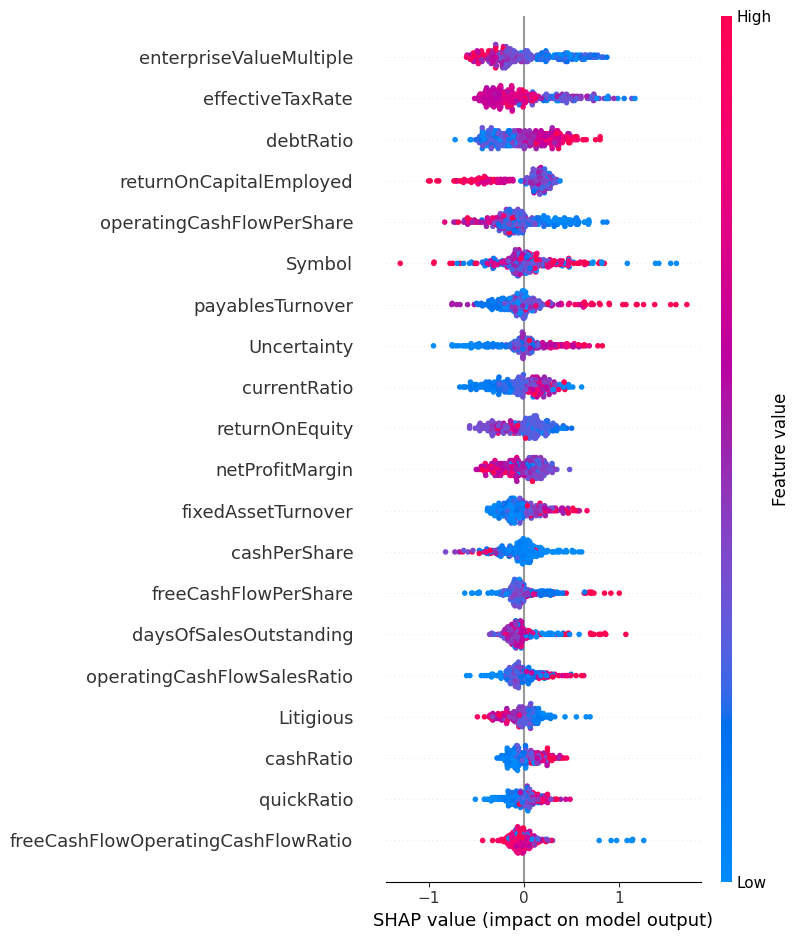

Summary plot for Class BBB


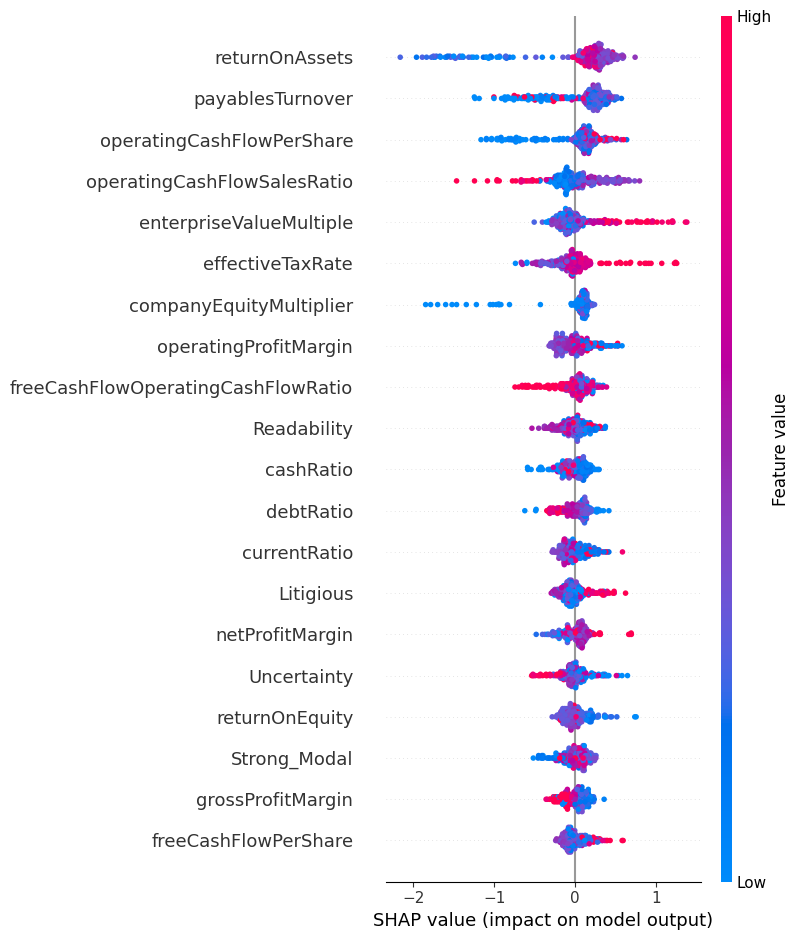

Summary plot for Class CCC–


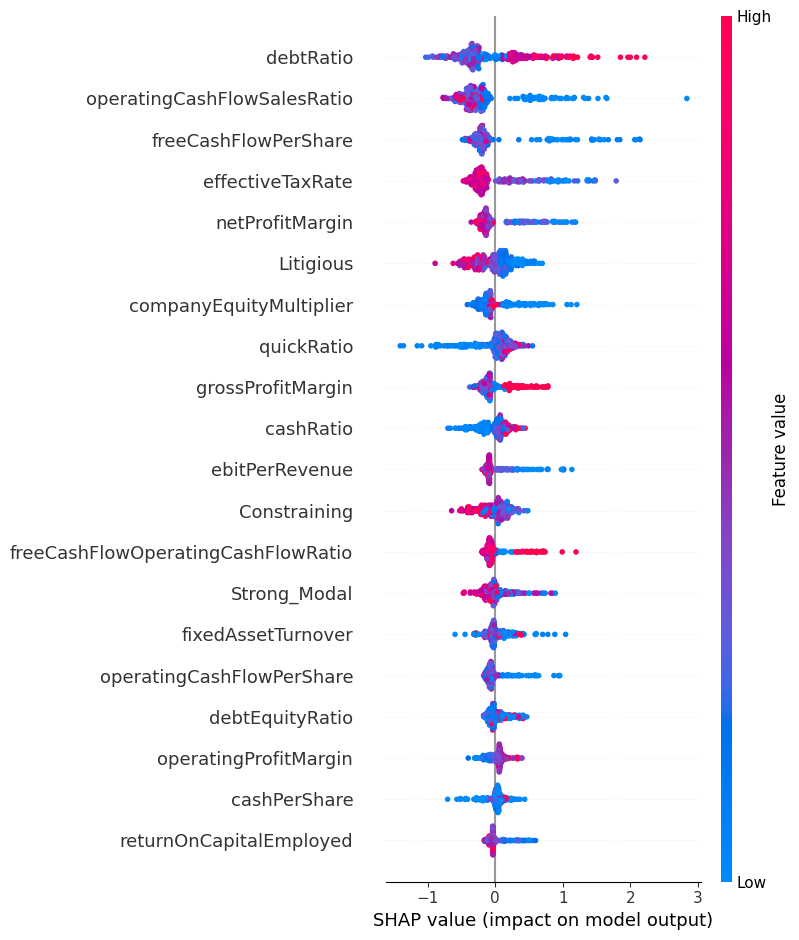

In [71]:
rattings = ['A', 'AA+', 'B', 'BB', 'BBB', 'CCC–']

#shap.summary_plot(shap_value, xTest)
for class_index in range(shap_value.shape[-1]):  # Iterate over the number of classes
    print(f"Summary plot for Class {rattings[class_index]}")
    shap.summary_plot(shap_value[..., class_index], xTest, feature_names=xTest.columns)


In [75]:
shap.initjs()
#shap.force_plot(shap.TreeExplainer(model).expected_value[0], shap_value[0], xTrain.columns)
shap.plots.force(shap.TreeExplainer(model).expected_value[1], shap_explaner.values[:,:,0], xTest.values[0])



In [76]:
# Force plot for single tuple
shap.initjs()


#shap.force_plot(shap.TreeExplainer(model).expected_value[0], shap_value[0], xTrain.columns)

shap.plots.force(shap.TreeExplainer(model).expected_value[0], shap_explaner.values[42,:,0], xTest.values[0])